In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_csv("../data/labelled/5C.csv")

In [29]:
data = data.drop(columns=['timestamp', 'session', 'hr_min','hr_max','temp_min','temp_max','eda_min','eda_max','bvp_min','bvp_max'])

In [30]:
corr = data.corr()

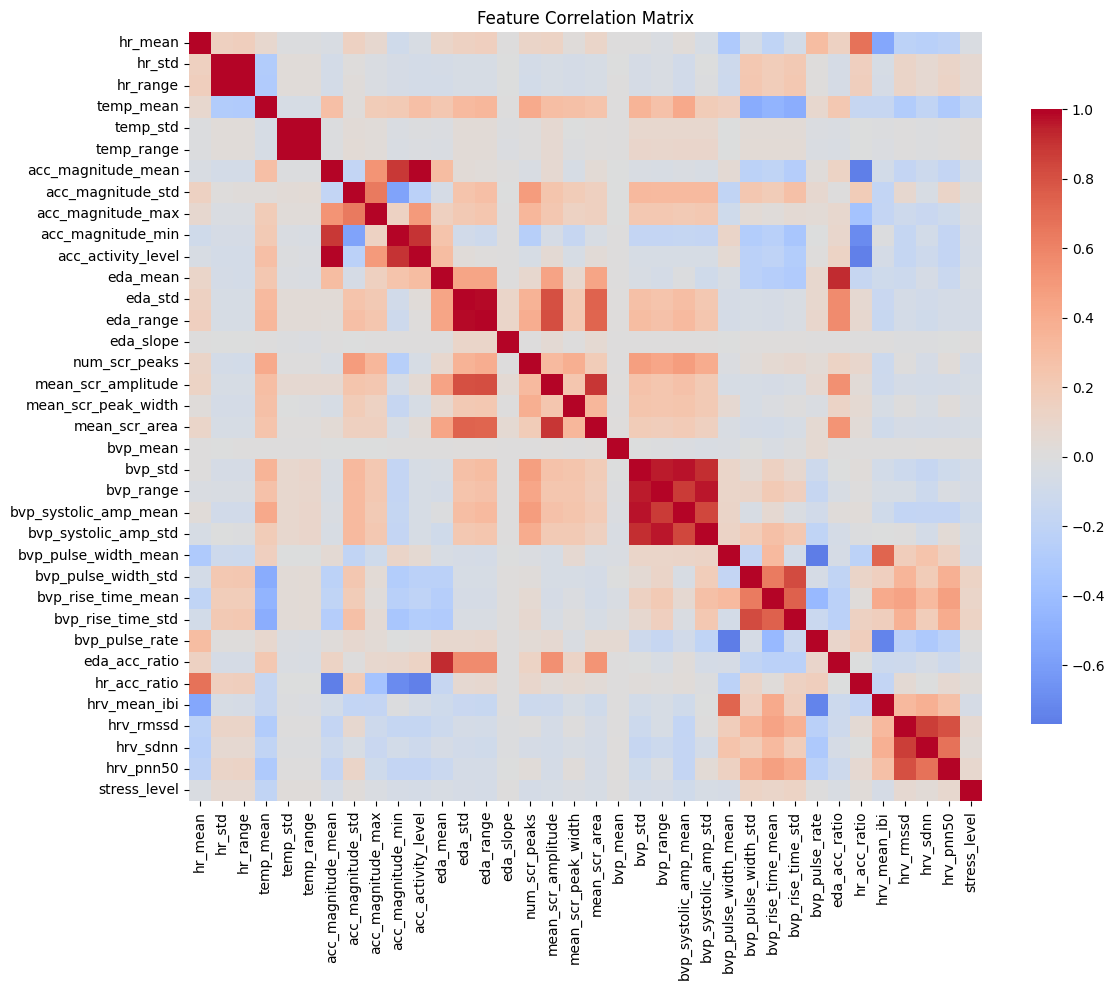

In [31]:
# --- 2. Visualize it (with seaborn) ---
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f", center=0,
            cbar_kws={"shrink": .8})
plt.title("Feature Correlation Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [32]:
# --- 3. Find all pairs above a threshold ---
threshold = 0.9
# only look at upper triangle, excluding the diagonal
upper = corr.abs().where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# stack = convert to long form, then filter
high_corr = (upper
             .stack()
             .reset_index()
             .rename(columns={"level_0":"feature1", "level_1":"feature2", 0:"corr"})
             .query("corr > @threshold")
             .sort_values("corr", ascending=False))

print(f"Highly correlated pairs (|corr| > {threshold}):")
for _, row in high_corr.iterrows():
    print(f"  {row['feature1']}  ↔  {row['feature2']}  :  {row['corr']:.2f}")

Highly correlated pairs (|corr| > 0.9):
  acc_magnitude_mean  ↔  acc_activity_level  :  0.99
  hr_std  ↔  hr_range  :  0.99
  temp_std  ↔  temp_range  :  0.99
  eda_std  ↔  eda_range  :  0.98
  bvp_std  ↔  bvp_systolic_amp_mean  :  0.97
  bvp_range  ↔  bvp_systolic_amp_std  :  0.96
  bvp_std  ↔  bvp_range  :  0.95
  eda_mean  ↔  eda_acc_ratio  :  0.92
  bvp_std  ↔  bvp_systolic_amp_std  :  0.92
